In [52]:
import pandas as pd
import numpy as np

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import streamlit
import random
from collections import deque
import torch
import torch.nn as nn
import torch.optim as optim

In [138]:
data = pd.read_csv(r"C:\datasets\nutrients_csvfile.csv")
data

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
331,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
332,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
333,Coffee,1 cup,230,3,t,0,0,0,1,"Drinks,Alcohol, Beverages"


In [139]:
data = data.drop('Measure', axis=1)
data

,Food,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,976,660,32,40,36,0,48,Dairy products
1,Milk skim,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",252,345,16,20,18,0,24,Dairy products
4,Fortified milk,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
331,Ginger ale,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
332,Root beer,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
333,Coffee,230,3,t,0,0,0,1,"Drinks,Alcohol, Beverages"


In [79]:
select_df = data[['Food', 'Carbs']]
select_df

,Food,Carbs
0,Cows' milk,48
1,Milk skim,52
2,Buttermilk,13
3,"Evaporated, undiluted",24
4,Fortified milk,119
...,...,...
330,Fruit-flavored soda,42
331,Ginger ale,28
332,Root beer,35
333,Coffee,1


In [216]:
data = data.replace("1,373", 0)
data = data.replace("1,373'", 0)

<Axes: xlabel='Category'>

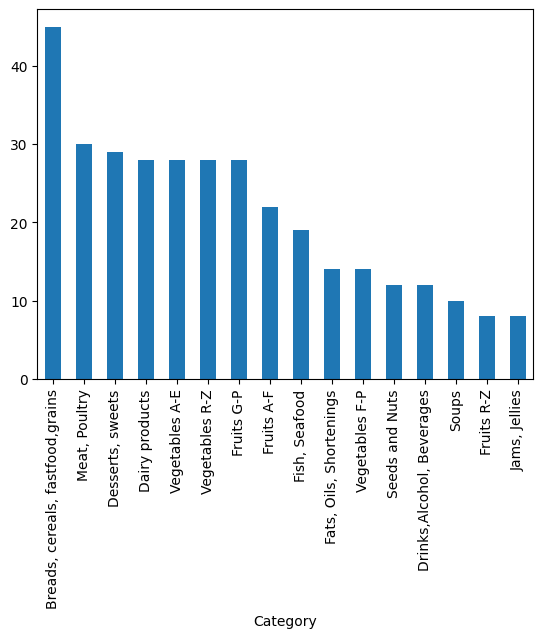

In [3]:
data['Category'].value_counts().plot.bar()

In [4]:
data.isnull().sum()

Food        0
Measure     0
Grams       0
Calories    1
Protein     0
Fat         0
Sat.Fat     2
Fiber       0
Carbs       0
Category    0
dtype: int64

In [142]:
data.dropna(inplace = True)

In [143]:
data['Carbs'] = pd.to_numeric(data['Carbs'], errors='coerce')

data['Food'] = data['Food'].astype('category')
data['Food'] = data['Food'].cat.codes

# Alternatively, use one-hot encoding
data = pd.get_dummies(data, columns=['Category'])

In [144]:
data

,Food,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,"Category_Breads, cereals, fastfood,grains",Category_Dairy products,...,Category_Fruits A-F,Category_Fruits G-P,Category_Fruits R-Z,"Category_Jams, Jellies","Category_Meat, Poultry",Category_Seeds and Nuts,Category_Soups,Category_Vegetables A-E,Category_Vegetables F-P,Category_Vegetables R-Z
0,75,976,660,32,40,36,0,48.0,False,True,...,False,False,False,False,False,False,False,False,False,False
1,162,984,360,36,0,0,0,52.0,False,True,...,False,False,False,False,False,False,False,False,False,False
2,35,246,127,9,5,4,0,13.0,False,True,...,False,False,False,False,False,False,False,False,False,False
3,95,252,345,16,20,18,0,24.0,False,True,...,False,False,False,False,False,False,False,False,False,False
4,101,"1,419","1,373",89,42,23,1.4,119.0,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,112,346,161,0,0,0,0,42.0,False,False,...,False,False,False,False,False,False,False,False,False,False
331,116,346,105,0,0,0,0,28.0,False,False,...,False,False,False,False,False,False,False,False,False,False
332,240,346,140,0,0,0,0,35.0,False,False,...,False,False,False,False,False,False,False,False,False,False
333,61,230,3,0,0,0,0,1.0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
data.isnull().sum()

Food        0
Measure     0
Grams       0
Calories    0
Protein     0
Fat         0
Sat.Fat     0
Fiber       0
Carbs       0
Category    0
dtype: int64

In [30]:
data1 = pd.read_csv(r'C:\datasets\DOHMH_MenuStat__Historical_.csv')
data1

C:\Users\USER\AppData\Local\Temp\ipykernel_12016\2718196312.py:1: DtypeWarning: Columns (9,40) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv(r'C:\datasets\DOHMH_MenuStat__Historical_.csv')


,Menu_Item_ID,Year,Restaurant_Item_Name,restaurant,Restaurant_ID,Food,Item_Description,Food_Category,Serving_Size,Serving_Size_text,...,Sodium_text,Potassium_text,Carbohydrates_text,Protein_text,Sugar_text,Dietary_Fiber_text,Kids_Meal,Limited_Time_Offer,Regional,Shareable
0,35005,2017,7 Eleven Mocha Iced Coffee,7 Eleven,1,Mocha Iced Coffee,"Mocha Iced Coffee, Chillers Iced Coffee, Drinks",Beverages,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1,35008,2017,7 Eleven French Vanilla Iced Coffee,7 Eleven,1,French Vanilla Iced Coffee,"French Vanilla Iced Coffee, Chillers Iced Coff...",Beverages,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2,35027,2017,7 Eleven French Vanilla Cappuccino,7 Eleven,1,French Vanilla Cappuccino,"French Vanilla Cappuccino, Coffee, Drinks, Fla...",Beverages,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0
3,35028,2017,7 Eleven Peppermint Mocha,7 Eleven,1,Peppermint Mocha,"Peppermint Mocha, Coffee, 8 fl oz",Beverages,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,35029,2017,7 Eleven Pumpkin Spice Latte,7 Eleven,1,Pumpkin Spice Latte,"Pumpkin Spice Latte, Coffee, 8 fl oz",Beverages,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65214,118344,2018,"Einstein Bros Frozen Mocha, 24 fl oz",Einstein Bros,31,"Frozen Mocha, 24 fl oz","Frozen Mocha w/ 2% Milk, 24 fl oz, Classic, Be...",Beverages,24.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
65215,153014,2018,Dunkin' Donuts Sweet Black Pepper Bacon Wake U...,Dunkin' Donuts,30,Sweet Black Pepper Bacon Wake Up Wrap,"Sweet Black Pepper Bacon Wake Up Wrap, Breakfa...",Sandwiches,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
65216,174902,2018,LongHorn Steakhouse Whiskey Smash,LongHorn Steakhouse,53,Whiskey Smash,"Whiskey Smash w/ Jim Beam Bourbon, Fresh Squee...",Beverages,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
65217,131673,2018,Golden Corral Chicken Enchilada,Golden Corral,37,Chicken Enchilada,"Chicken Enchilada, Chicken & Turkey",Entrees,127.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [26]:
data1.isnull().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

In [31]:
data2 = pd.read_csv(r'C:\datasets\fastfood.csv')
data2

,restaurant,Food,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,Carbs,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,Other
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,NaN,NaN,NaN,Other
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,NaN,NaN,NaN,Other
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,NaN,NaN,NaN,Other


In [47]:
from sklearn.impute import SimpleImputer

class KnowledgeBase:
    def __init__(self, data_path1, data_path2, data_path3):
        # Load the datasets from Excel files
        data1 = pd.read_csv(data_path1)
        data2 = pd.read_csv(data_path2)
        data3 = pd.read_csv(data_path3)
        data1 = data1.replace("t", 0)
        data1 = data1.replace("t'", 0)
        
        # Combine the datasets
        self.data = pd.concat([data1, data2, data3], ignore_index=True)

        # Handle missing values in 'Carbs' column using median imputation
        self.data['Carbs'] = SimpleImputer(strategy='median').fit_transform(self.data[['Carbs']])

        # Convert 'Carbs' to numeric in case imputation didn't cover all cases
        self.data['Carbs'] = pd.to_numeric(self.data['Carbs'], errors='coerce')

    def get_food_info(self, food_id):
        # Retrieve nutritional information for a specific food item by ID
        return self.data.iloc[food_id]

In [44]:
def get_food_info(self, food_id):
        # Retrieve nutritional information for a specific food item by ID
    return self.data.iloc[food_id]

In [48]:
class QLearningAgent:
    def __init__(self, num_actions, learning_rate=0.1, discount_factor=0.9, epsilon=0.1):
        self.num_actions = num_actions
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.q_table = np.zeros((3, num_actions))  # 3 rows for breakfast, lunch, dinner

    def choose_action(self, meal_type):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.num_actions)
        else:
            return np.argmax(self.q_table[meal_type])

    def update_q_table(self, meal_type, action, reward, next_max_q_value):
        self.q_table[meal_type, action] += self.learning_rate * (reward + self.discount_factor * next_max_q_value - self.q_table[meal_type, action])

In [51]:
def main():
    knowledge_base = KnowledgeBase(r"C:\datasets\nutrients_csvfile.csv", r"C:\datasets\DOHMH_MenuStat__Historical_.csv", r"C:\datasets\fastfood.csv")
    num_food_items = len(knowledge_base.data)
    agent = QLearningAgent(num_food_items)

    num_episodes = 1000
    meal_types = {'breakfast': 0, 'lunch': 1, 'dinner': 2}

    for episode in range(num_episodes):
        for meal_type, index in meal_types.items():
            action = agent.choose_action(index)
            food_info = knowledge_base.get_food_info(action)
            
            # Determine reward based on carbs content
            carbs_threshold = 50  # Example threshold in grams
            reward = -1 if food_info['Carbs'] > carbs_threshold else 1

            next_max_q_value = np.max(agent.q_table[index])
            agent.update_q_table(index, action, reward, next_max_q_value)

    best_choices = {meal: knowledge_base.get_food_info(np.argmax(agent.q_table[index]))['Food'] for meal, index in meal_types.items()}
    print("Recommended food items for each meal:")
    for meal, food in best_choices.items():
        print(f"{meal.title()}: {food}")

if __name__ == "__main__":
    main()

C:\Users\USER\AppData\Local\Temp\ipykernel_12016\60341691.py:7: DtypeWarning: Columns (9,40) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv(data_path2)


Recommended food items for each meal:
Breakfast: Capri Sun 100% Apple Juice
Lunch: Texas Bacon Buford
Dinner: Cows' milk


Implementing Deep Q-learning

In [53]:
class DQN(nn.Module):
    def __init__(self, input_size, output_size):
        super(DQN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, output_size)
        )

    def forward(self, x):
        return self.network(x)

In [54]:
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        samples = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*samples)
        return np.array(states), np.array(actions), np.array(rewards), np.array(next_states), np.array(dones)

    def __len__(self):
        return len(self.buffer)

In [64]:
class Agent:
    def __init__(self, state_dim, action_dim, replay_buffer):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.replay_buffer = replay_buffer
        self.model = DQN(state_dim, action_dim)
        self.optimizer = optim.Adam(self.model.parameters())
        self.criterion = nn.MSELoss()
        self.epsilon = 0.1

    def act(self, state):
        if random.random() > self.epsilon:
            state = torch.FloatTensor(state).unsqueeze(0)
            q_values = self.model(state)
            action = q_values.max(1)[1].item()
        else:
            action = random.randrange(self.action_dim)
        return action

    def learn(self, batch_size):
        if len(self.replay_buffer) < batch_size:
            return
        states, actions, rewards, next_states, dones = self.replay_buffer.sample(batch_size)
        states = torch.FloatTensor(states)
        next_states = torch.FloatTensor(next_states)
        actions = torch.LongTensor(actions)
        rewards = torch.FloatTensor(rewards)
        dones = torch.FloatTensor(dones)

        q_values = self.model(states)
        next_q_values = self.model(next_states)
        q_value = q_values.gather(1, actions.unsqueeze(1)).squeeze(1)
        next_q_value = next_q_values.max(1)[0]
        expected_q_value = rewards + 0.99 * next_q_value * (1 - dones)

        loss = self.criterion(q_value, expected_q_value.detach())
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # Epsilon decay
        if self.epsilon > 0.01:
            self.epsilon *= 0.995

In [66]:
import re

def extract_number(input_string):
    # This regex will find all numbers in the string
    numbers = re.findall(r'[\d\./]+', input_string)
    if numbers:
        # Just return the first number found (this part can be customized)
        return numbers[0]
    return None  # Return None or 0 if no number found

In [86]:
def load_data():
    # Assuming Excel file path: 'data.xlsx', which includes columns like 'Carbs', 'Fats', etc.
    data = pd.read_csv(r"C:\datasets\nutrients_csvfile.csv")
    data = data[['Food', 'Carbs']]
    data['Carbs'] = pd.to_numeric(data['Carbs'], errors='coerce')

    data['Food'] = data['Food'].astype('category')
    data['Food'] = data['Food'].cat.codes

# Alternatively, use one-hot encoding
    data = pd.get_dummies(data, columns=['Food'])
    # Normalize data
    for column in data.columns:
        if column != 'Food':
            data[column] = (data[column] - data[column].mean()) / data[column].std()
    return data

In [223]:
class Environment:
    def __init__(self, data):
        self.data = data
        self.current_index = 0

    def reset(self):
        self.current_index = 0
        return self.data.iloc[0].values[:-1]  # Assuming last column is not part of the state

    def step(self, action):
        # Here you'd have more complex logic to determine the consequence of an action
        self.current_index += 1
        done = False
        reward = 0

        if self.current_index < len(self.data):
            food_item = self.data.iloc[self.current_index]
            next_state = food_item.values[:-1]
            
            # Hypothetical nutritional values
            Carb_content = food_item['Carbs']  # assuming there is a 'Sugar' column
            #fiber_content = food_item['Fiber']  # assuming there is a 'Fiber' column

            # Reward calculation based on hypothetical conditions
            if Carb_content >= 0 and Carb_content <=20:  # High sugar content is bad
                reward = 10
            elif Carb_content >= 21 and Carb_content <=30:  # High fiber content is good
                reward = 1
            elif Carb_content >=31 and Carb_content <=50:
                reward = 0
            else:
                reward = -50  # Neutral/unknown items get a small penalty

            if self.current_index == len(self.data) - 1:
                done = True
        else:
            next_state = None
            done = True

        return next_state, reward, done

In [224]:
def train_agent():
    data = load_data()
    env = Environment(data)
    replay_buffer = ReplayBuffer(10000)
    agent = Agent(data.shape[1] - 1, 2, replay_buffer)  # Assuming binary actions: recommend or not

    num_episodes = 200
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = agent.act(state)
            next_state, reward, done = env.step(action)
            if next_state is not None:
                replay_buffer.push(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
            agent.learn(64)

        print(f'Episode {episode + 1}, Total Reward: {total_reward}')

if __name__ == '__main__':
    train_agent()

Episode 1, Total Reward: -10160
Episode 2, Total Reward: -10160
Episode 3, Total Reward: -10160
Episode 4, Total Reward: -10160
Episode 5, Total Reward: -10160
Episode 6, Total Reward: -10160
Episode 7, Total Reward: -10160
Episode 8, Total Reward: -10160
Episode 9, Total Reward: -10160
Episode 10, Total Reward: -10160
Episode 11, Total Reward: -10160
Episode 12, Total Reward: -10160
Episode 13, Total Reward: -10160
Episode 14, Total Reward: -10160
Episode 15, Total Reward: -10160
Episode 16, Total Reward: -10160
Episode 17, Total Reward: -10160
Episode 18, Total Reward: -10160
Episode 19, Total Reward: -10160
Episode 20, Total Reward: -10160
Episode 21, Total Reward: -10160
Episode 22, Total Reward: -10160
Episode 23, Total Reward: -10160
Episode 24, Total Reward: -10160
Episode 25, Total Reward: -10160
Episode 26, Total Reward: -10160
Episode 27, Total Reward: -10160
Episode 28, Total Reward: -10160
Episode 29, Total Reward: -10160
Episode 30, Total Reward: -10160
Episode 31, Total R

Implementing Proximal policy optimization

In [202]:
# Environment Setup
class DiabeticDietEnv:
    def __init__(self, data):
        self.data = data
        self.state = np.zeros(5)  # Example state: [Carbs, Fats, Protein, Fibers, Calories]
        self.day_limit = np.array([300, 70, 100, 30, 2000])  # Example dietary limits

    def step(self, action):
        # Update state with nutritional content of the chosen food
        nutrition = self.data.iloc[action][['Carbs', 'Fat', 'Protein', 'Fiber', 'Calories']].values.astype(float)
        if nutrition.shape != (5,):
           nutrition = nutrition.reshape(-1)

        self.state += nutrition

        reward = -np.sum(np.maximum(self.state - self.day_limit, 0))
        done = np.any(self.state >= self.day_limit)
        return self.state, reward, done

    def reset(self):
        self.state = np.zeros(5)
        return self.state

    def sample_action(self):
        return np.random.randint(0, len(self.data))

In [203]:
class ActorCritic(nn.Module):
    def __init__(self, state_size, action_size):
        super(ActorCritic, self).__init__()
        self.actor = nn.Sequential(
            nn.Linear(state_size, 128),
            nn.ReLU(),
            nn.Linear(128, action_size),
            nn.Softmax(dim=-1)
        )
        self.critic = nn.Sequential(
            nn.Linear(state_size, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, state):
        state = torch.FloatTensor(state)
        action_probs = self.actor(state)
        state_value = self.critic(state)
        return action_probs, state_value

In [206]:
def compute_gae(next_value, rewards, masks, values, gamma=0.99, tau=0.95):
    values = values + [next_value]
    gae = 0
    returns = []
    for step in reversed(range(len(rewards))):
        delta = rewards[step] + gamma * values[step + 1] * masks[step] - values[step]
        gae = delta + gamma * tau * masks[step] * gae
        returns.insert(0, gae + values[step])
    return returns

def ppo_update(policy, optimizer, states, actions, log_probs_old, returns, advantages, clip_param=0.2):
    states = torch.stack(states) if isinstance(states[0], torch.Tensor) else torch.FloatTensor(states)
    actions = torch.tensor(actions, dtype=torch.long)
    log_probs_old = torch.stack(log_probs_old) if isinstance(log_probs_old[0], torch.Tensor) else torch.FloatTensor(log_probs_old)
    returns = torch.stack(returns) if isinstance(returns[0], torch.Tensor) else torch.FloatTensor(returns)
    advantages = torch.stack(advantages) if isinstance(advantages[0], torch.Tensor) else torch.FloatTensor(advantages)
    
    action_probs, state_values = policy(states)
    dist = Categorical(action_probs)

    new_log_probs = dist.log_prob(actions)
    ratios = torch.exp(new_log_probs - log_probs_old)
    
    surr1 = ratios * advantages
    surr2 = torch.clamp(ratios, 1.0 - clip_param, 1.0 + clip_param) * advantages
    actor_loss = -torch.min(surr1, surr2).mean()
    critic_loss = (returns - state_values.squeeze()).pow(2).mean()

    loss = actor_loss + critic_loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


def train(env, policy, optimizer, episodes):
    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0
        log_probs = []
        values = []
        states = []
        actions = []
        rewards = []
        masks = []
        while not done:
            state = torch.FloatTensor(state).unsqueeze(0)
            action_probs, value = policy(state)
            dist = Categorical(action_probs)
            
            action = dist.sample()
            next_state, reward, done = env.step(action.numpy())
            
            log_prob = dist.log_prob(action)
            log_probs.append(log_prob)
            values.append(value.squeeze().item())
            rewards.append(reward)
            masks.append(1 - float(done))
            states.append(state)
            actions.append(action.item())
            
            state = next_state
            total_reward += reward
        
        next_state = torch.FloatTensor(next_state).unsqueeze(0)
        _, next_value = policy(next_state)
        returns = compute_gae(next_value, rewards, masks, values)
        
        advantages = [ret - value for ret, value in zip(returns, values)]
        
        ppo_update(policy, optimizer, states, actions, log_probs, returns, advantages)
        
        print(f'Episode {episode}: Total Reward: {total_reward}')


In [217]:
env = DiabeticDietEnv(data)
state_size = 5  # Example: Carbs, Fats, Protein, Fibers, Calories
action_size = len(data)  # Number of food items
policy = ActorCritic(state_size, action_size)
optimizer = optim.Adam(policy.parameters(), lr=3e-4)

# Start training
train(env, policy, optimizer, episodes=150)

Episode 0: Total Reward: -146.4
Episode 1: Total Reward: -151.0
Episode 2: Total Reward: -151.5
Episode 3: Total Reward: -146.0
Episode 4: Total Reward: -146.0
Episode 5: Total Reward: -183.2
Episode 6: Total Reward: -152.1
Episode 7: Total Reward: -148.8
Episode 8: Total Reward: -158.1
Episode 9: Total Reward: -189.0
Episode 10: Total Reward: -156.5
Episode 11: Total Reward: -164.4
Episode 12: Total Reward: -181.0
Episode 13: Total Reward: -151.0
Episode 14: Total Reward: -153.2
Episode 15: Total Reward: -149.31
Episode 16: Total Reward: -165.0
Episode 17: Total Reward: -154.2
Episode 18: Total Reward: -152.6
Episode 19: Total Reward: -148.0
Episode 20: Total Reward: -171.0
Episode 21: Total Reward: -153.0
Episode 22: Total Reward: -181.0
Episode 23: Total Reward: -180.0
Episode 24: Total Reward: -209.9
Episode 25: Total Reward: -148.0
Episode 26: Total Reward: -149.5
Episode 27: Total Reward: -164.0
Episode 28: Total Reward: -148.0
Episode 29: Total Reward: -173.3
Episode 30: Total R

In [218]:
def train_dqn(env, model, episodes):
    rewards = []
    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = model.select_action(state)
            next_state, reward, done = env.step(action)
            model.update(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
        rewards.append(total_reward)
    return rewards

In [219]:
def train_model(env, model, episodes, algorithm_name="Algorithm"):
    total_rewards = []
    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0
        while not done:
            action = model.select_action(state) if algorithm_name == 'DQN' else model.predict(state)[0]
            next_state, reward, done, _ = env.step(action)
            model.update(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
        total_rewards.append(total_reward)
        if episode % 10 == 0:
            print(f"{algorithm_name} - Episode {episode}: Total Reward = {total_reward}")
    return total_rewards

In [226]:
dqn_rewards = [9, 4, 6, 3, 7, 9, 18, 23]  # Replace these with your actual DQN rewards
ppo_rewards = [-151, -146, 78, -23, 65, -45, 54, -176]

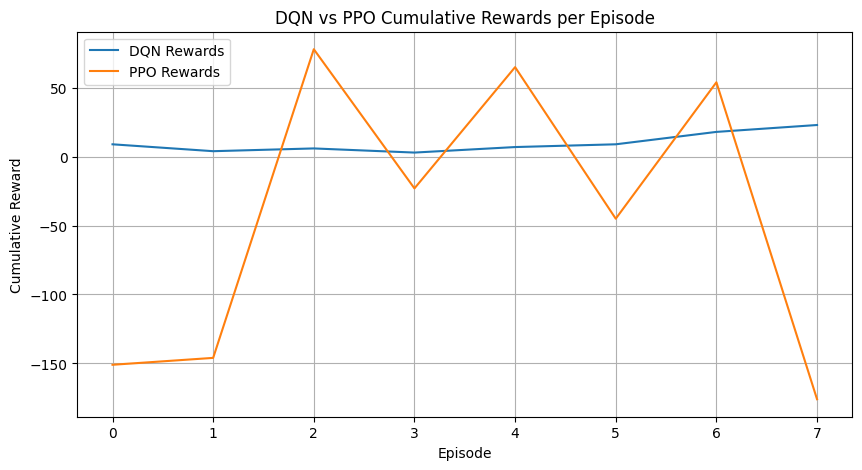

In [227]:
import matplotlib.pyplot as plt

# Creating the plot
plt.figure(figsize=(10, 5))
plt.plot(dqn_rewards, label='DQN Rewards')
plt.plot(ppo_rewards, label='PPO Rewards')
plt.title('DQN vs PPO Cumulative Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.grid(True)
plt.show()